# Machine Learning Camp: HomeWork 7 Section 2 part2

# 2. Walmart Sales Analysis: load and read the dataset walmart_sales.csv and walmart_fuel_prices.csv.

<!-- We will follow the following data description when working with the above 2 datasets:

index: index is a default value of count
Store: Store is represented in number ID(1,2,3,4,...)
Dept: Dept is Department in each Store represented in number ID (1,2,3,4,...)
Date: Date is in YYYY-MM-DD char format - needs to be converted into Date data type
Weekly_Sales: Sales of a given Dept in a given Store for the Date
Temperature: Average temperature on the Date at given Store region
Fuel_Price: Cost of the Fuel on the given Date at a given Store
IsHoliday: Is the given Date a holiday Week? -->

We will follow the following data description when working with the above 2 datasets:

index: index is a default value of count

Store: Store is represented in number ID(1,2,3,4,...)

Dept: Dept is Department in each Store represented in number ID (1,2,3,4,...)

Date: Date is in YYYY-MM-DD char format - needs to be converted into Date data type

Weekly_Sales: Sales of a given Dept in a given Store for the Date

Temperature: Average temperature on the Date at given Store region

Fuel_Price: Cost of the Fuel on the given Date at a given Store

IsHoliday: Is the given Date a holiday Week?

In [285]:
import pandas as pd
import seaborn as sns
import holidays
import collections

### a. For both datasets, breakdown the Date column and create additional new columns Year, Month, and Day. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [112]:
walmart_sales = pd.read_csv("walmart_sales.csv",parse_dates=["Date"],index_col="Date")
walmart_fuel_prices = pd.read_csv("walmart_fuel_prices.csv",parse_dates=["Date"],index_col="Date")

In [113]:
def additional_new_columns(data):
    data["Year"] = data.index.year
    data["Month"] = data.index.month
    data["Day"] = data.index.day
additional_new_columns(walmart_sales)
additional_new_columns(walmart_fuel_prices)

In [170]:
walmart_sales.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month', 'Day'], dtype='object')

In [171]:
walmart_fuel_prices.columns

Index(['index', 'Store', 'Temperature', 'Fuel_Price', 'IsHoliday', 'Year',
       'Month', 'Day'],
      dtype='object')

### b. In walmart_sales: which Month(s) of Year have the highest Weekly_Sales? Report the Year, Month, Store, and Dept.

In [68]:
b = walmart_sales.nlargest(1,['Weekly_Sales'])
b[["Year","Month","Store","Dept"]]

,Year,Month,Store,Dept
Date,,,,
2010-11-26,2010,11,10,72


### c. In walmart_sales: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [533]:
round((walmart_sales.groupby(by=['Store','Month','Dept'],as_index=False)
 .aggregate({'Weekly_Sales':'mean'})
 .sort_values('Weekly_Sales',ascending=False)),0)

,Store,Month,Dept,Weekly_Sales
8580,10,11,72,276410.0
30285,35,11,72,219789.0
8656,10,12,72,214197.0
12150,14,11,92,206537.0
12224,14,12,92,199631.0
...,...,...,...,...
29337,34,10,47,-598.0
13306,16,3,47,-832.0
37156,45,2,47,-875.0
1617,2,10,47,-1098.0


### d. In walmart_sales: which month of year 2011 has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for 2012. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [546]:
def call_holiday(month , year):
    for i in range(1,30):
        if i<10:
            holidays.US.get('0i-month-year')
        
call_holiday( , 2020)

SyntaxError: invalid syntax (3858586339.py, line 6)

In [339]:
def call_holiday(year):
    counter_holiday=[]
    for ptr in holidays.US(years = year).items():counter_holiday.append((ptr[0].month))
    counterholiday = collections.Counter(counter_holiday)
    return holidays.US(year),counterholiday

In [340]:
call_holiday(2011)

({datetime.date(2011, 1, 1): "New Year's Day", datetime.date(2011, 1, 17): 'Martin Luther King Jr. Day', datetime.date(2011, 2, 21): "Washington's Birthday", datetime.date(2011, 5, 30): 'Memorial Day', datetime.date(2011, 7, 4): 'Independence Day', datetime.date(2011, 9, 5): 'Labor Day', datetime.date(2011, 10, 10): 'Columbus Day', datetime.date(2011, 11, 11): 'Veterans Day', datetime.date(2011, 11, 24): 'Thanksgiving', datetime.date(2011, 12, 25): 'Christmas Day', datetime.date(2011, 12, 26): 'Christmas Day (Observed)'},
 Counter({1: 2, 2: 1, 5: 1, 7: 1, 9: 1, 10: 1, 11: 2, 12: 2}))

In [341]:
call_holiday(2012)

({datetime.date(2012, 1, 1): "New Year's Day", datetime.date(2012, 1, 2): "New Year's Day (Observed)", datetime.date(2012, 1, 16): 'Martin Luther King Jr. Day', datetime.date(2012, 2, 20): "Washington's Birthday", datetime.date(2012, 5, 28): 'Memorial Day', datetime.date(2012, 7, 4): 'Independence Day', datetime.date(2012, 9, 3): 'Labor Day', datetime.date(2012, 10, 8): 'Columbus Day', datetime.date(2012, 11, 11): 'Veterans Day', datetime.date(2012, 11, 12): 'Veterans Day (Observed)', datetime.date(2012, 11, 22): 'Thanksgiving', datetime.date(2012, 12, 25): 'Christmas Day'},
 Counter({1: 3, 2: 1, 5: 1, 7: 1, 9: 1, 10: 1, 11: 3, 12: 1}))

In [357]:
def most_sales_month(year):
    return walmart_sales[walmart_sales["Year"]==year].resample("M").sum().nlargest(1,["Weekly_Sales"]).index[0].month

In [358]:
def result_most(year):
    if (call_holiday(year)[1][most_sales_month(year)])>0:
        print(year , "most is Holiday")
    else:
        print(year , "most is Holiday")
    
result_most(2011)
result_most(2012)

2011 most is Holiday
2012 most is Holiday


### e. In walmart_sales: report the lowest sales per month for the year 2011 for IsHoliday == TRUE. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for 2012 and report if the lowest sales are on the same month.

In [344]:
def small_sales_month(year):
    return walmart_sales[walmart_sales["Year"]==year].resample("M").sum().nsmallest(1,["Weekly_Sales"]).index[0].month

In [345]:
small_sales_month(2011)

1

In [346]:
small_sales_month(2012)

1

In [347]:
def result_small(year):
    if (call_holiday(year)[1][small_sales_month(year)])>0:
        print(year, "small is Holiday")
    else:
        print(year, "small is NoHoliday")
    
result_small(2011)
result_small(2012)

2011 small is Holiday
2012 small is Holiday


### f. In walmart_sales: We have 45 unique stores. Generate a nice plot on the total sales by store for the year 2012. Report the Store number.

In [369]:
# walmart_sales[walmart_sales["Year"]== 2012].groupby(["Store"])["Weekly_Sales"].sum().plot()

### g. In walmart_fuel_prices: For the year 2011 do you think higher the temperature relates to higher fuel price? Support your answer with a nice plot.

In [372]:
g = walmart_fuel_prices[walmart_fuel_prices["Year"] == 2011][['Temperature','Fuel_Price']].corr()
g

,Temperature,Fuel_Price
Temperature,1.00000,0.48825
Fuel_Price,0.48825,1.00000


<AxesSubplot:>

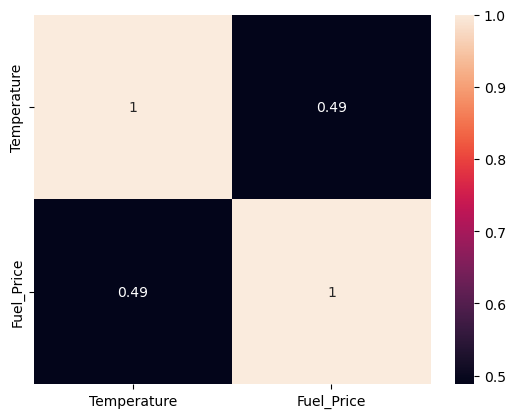

In [374]:
sns.heatmap(g, annot = True)

### h. In walmart_fuel_prices: For the year 2010 which Store had the lowest Fuel Price? Report the month and temperature. On the same month, what was the highest fuel price for the store? Report the difference.

In [449]:
df_walmart_fuel_prices= walmart_fuel_prices[walmart_fuel_prices["Year"] == 2010]
lowest = df_walmart_fuel_prices.nsmallest(1,["Fuel_Price"])
lowest

,index,Store,Temperature,Fuel_Price,IsHoliday,Year,Month,Day
Date,,,,,,,,
2010-02-19,6373,36,45.66,2.472,False,2010,2,19


In [454]:
df_walmart_fuel_prices[df_walmart_fuel_prices["Month"] == lowest.values[0][-2]]
largest = df_walmart_fuel_prices.nlargest(1,["Fuel_Price"])
largest

,index,Store,Temperature,Fuel_Price,IsHoliday,Year,Month,Day
Date,,,,,,,,
2010-12-31,2596,15,26.54,3.336,True,2010,12,31


In [458]:
round(largest.values[0][3]-lowest.values[0][3],2)

0.86

### i. In walmart_fuel_prices: For the IsHoliday == TRUE, which month has the lowest Fuel Price for the year 2012? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [466]:
df_walmart_fuel_prices= walmart_fuel_prices[walmart_fuel_prices["Year"] == 2012]
lowest = df_walmart_fuel_prices.nsmallest(1,["Fuel_Price"])
print("month is ",lowest.values[0][-2])
lowest


month is  2


,index,Store,Temperature,Fuel_Price,IsHoliday,Year,Month,Day
Date,,,,,,,,
2012-02-03,1197,7,22.2,3.031,False,2012,2,3


In [510]:
print(lambda d: d in call_holiday(2020))

<function <lambda> at 0x7f30f8b45870>


In [467]:
def call_holiday(year):
    return holidays.US(year)

In [469]:
print(type(call_holiday(2020)))

<class 'holidays.countries.united_states.US'>


In [495]:
import holidays

# Create a dict-like object for England's public holidays
uk_holidays = holidays.UK(subdiv="England")

# Check some dates:
"2022-04-15" in uk_holidays  # True, Good Friday 2022
"2022-04-14" in uk_holidays  # False, the day before is just a normal working day

False

In [512]:
for key, val in sorted(call_holiday(2020).date()):
    print(key.month)

AttributeError: 'US' object has no attribute 'date'

In [506]:
call_holiday(2020).items().months

AttributeError: 'dict_items' object has no attribute 'months'

In [538]:
uk_holidays.get('01-01-2018')

"New Year's Day"